In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

### Maquinas de soporte vectorial

In [7]:
# Maquina de soporte Vectorial Lineal
def SVM_lineal():
    datos = datasets.load_iris()

    X=datos.data
    y= datos.target

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    # Crear la maquina de soporte vectorial
    svm_lineal=SVC(kernel='linear')
    svm_lineal.fit(X_train, y_train)

    # Evaluar la SVM
    y_pred = svm_lineal.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"El accuracy de la SVM lineal es {accuracy}")

In [4]:
SVM_lineal()

El accuracy de la SVM lineal es 1.0


In [8]:
def SVM_polinomial():
    datos = datasets.load_iris()

    X=datos.data
    y= datos.target

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    # Creacion de  la SVM polinomial de grado 3
    svm_poli = SVC(kernel='poly', degree=3)
    svm_poli.fit(X_train,y_train)

    # Evaluacion de la SVM
    y_pred = svm_poli.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)

    print(f"El accuracy de la SVM Polinomial es {accuracy}")

In [9]:
SVM_polinomial()

El accuracy de la SVM Polinomial es 1.0


In [10]:
# Kernel radial
def SVM_radial():
    datos = datasets.load_iris()

    X=datos.data
    y= datos.target

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    # Crear SVM con kernel radial
    svm_radial = SVC(kernel='rbf')
    svm_radial.fit(X_train, y_train)

    # Evaluar la SVM
    y_pred = svm_radial.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)

    print(f"El accuracy de la SVM Radial es {accuracy}")

In [11]:
SVM_radial()

El accuracy de la SVM Radial es 1.0


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
datos = datasets.load_iris()
X = datos.data[:,:2] # Tomar solo dos caracteristicas para visualizar el plano 2D
y=datos.target

In [14]:
kernels = ['linear', 'poly', 'rbf']


In [15]:
svms=[SVC(kernel=k) for k in kernels]

In [16]:
for svm in svms:
    svm.fit(X,y)

In [17]:
# Crear la malla de los puntos para graficar
X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

In [18]:
xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.02), np.arange(y_min, y_max, 0.02))

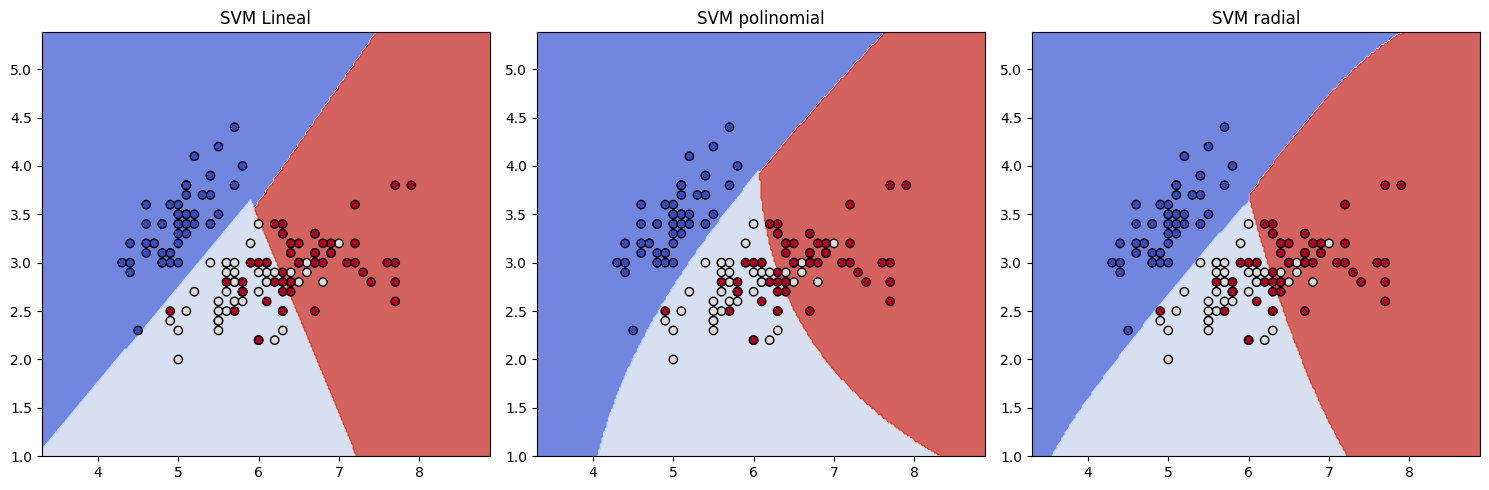

In [23]:
fig, sub=plt.subplots(1,3, figsize=(15,5))
titles = ['SVM Lineal', 'SVM polinomial', 'SVM radial']

for modelo, titulo, ax in zip(svms, titles, sub.flatten()):
    # Predecir la clase para cad apunto de la malla 
    z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) # Tener los datos en otra dimension

    #Graficar la superficie de la desicion (como definir las lineas en el plano )
    ax.contourf(xx, yy,z, cmap=plt.cm.coolwarm, alpha=0.8)

    #Graficar los puntos de datos 
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(titulo)

plt.tight_layout()
plt.show()
